## Experiments of the Paper "Fairness measures for biometric quality assessment"

In [1]:
# Imports
import sys
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from typing import List, Union

# Import Fairness Measures
sys.path.append(os.path.abspath('..'))
from fairness_measures.fairness_measure_gc import gini_coefficient
from fairness_measures.fairness_measure_lwm import low_weighted_mean_score
from fairness_measures.fairness_measure_mdg import mean_discard_gap

# Layout customization
sns.set_style("whitegrid")

#### Sample Quality Score Distributions for the fictious quality components Q1 and Q2

In [2]:
# Synthetic scores for fictious quality component Q1
synthetic_scores_Q1 = {
    "Demographic Groups": ["Group A"] * 10 + ["Group B"] * 10 + ["Group C"] * 10,
    "Quality_Score": [
        76, 78, 78, 80, 82, 82, 83, 84, 85, 85,  # Group A
        79, 82, 83, 83, 85, 86, 87, 88, 89, 91,  # Group B
        81, 82, 83, 84, 85, 85, 86, 90, 92, 93   # Group C
    ], 
}

df_Q1 = pd.DataFrame(synthetic_scores_Q1)

q1_Group_a_scores = np.array(df_Q1[df_Q1["Demographic Groups"] == "Group A"]["Quality_Score"])
q1_Group_b_scores = np.array(df_Q1[df_Q1["Demographic Groups"] == "Group B"]["Quality_Score"])
q1_Group_c_scores = np.array(df_Q1[df_Q1["Demographic Groups"] == "Group C"]["Quality_Score"])


q1_Group_a_scores_mean =df_Q1[df_Q1["Demographic Groups"] == "Group A"]["Quality_Score"].mean()
q1_Group_b_scores_mean =df_Q1[df_Q1["Demographic Groups"] == "Group B"]["Quality_Score"].mean()
q1_Group_c_scores_mean =df_Q1[df_Q1["Demographic Groups"] == "Group C"]["Quality_Score"].mean()

q1_Group_a_scores_median =df_Q1[df_Q1["Demographic Groups"] == "Group A"]["Quality_Score"].median()
q1_Group_b_scores_median =df_Q1[df_Q1["Demographic Groups"] == "Group B"]["Quality_Score"].median()
q1_Group_c_scores_median =df_Q1[df_Q1["Demographic Groups"] == "Group C"]["Quality_Score"].median()

In [3]:
# Synthetic scores for fictious quality component Q2
synthetic_scores_Q2 = {
    "Demographic Groups": ["Group A"] * 10 + ["Group B"] * 10 + ["Group C"] * 10,
    "Quality_Score": [
        74, 75, 75, 76, 77, 77, 77, 78, 78, 79,  # Group A
        85, 85, 87, 88, 89, 91, 91, 92, 93, 93,  # Group B
        86, 87, 88, 89, 90, 90, 91, 93, 94, 94   # Group C
    ], 
}

df_Q2 = pd.DataFrame(synthetic_scores_Q2)

q2_Group_a_scores = np.array(df_Q2[df_Q2["Demographic Groups"] == "Group A"]["Quality_Score"])
q2_Group_b_scores = np.array(df_Q2[df_Q2["Demographic Groups"] == "Group B"]["Quality_Score"])
q2_Group_c_scores = np.array(df_Q2[df_Q2["Demographic Groups"] == "Group C"]["Quality_Score"])

q2_Group_a_scores_mean =df_Q2[df_Q2["Demographic Groups"] == "Group A"]["Quality_Score"].mean()
q2_Group_b_scores_mean =df_Q2[df_Q2["Demographic Groups"] == "Group B"]["Quality_Score"].mean()
q2_Group_c_scores_mean =df_Q2[df_Q2["Demographic Groups"] == "Group C"]["Quality_Score"].mean()

q2_Group_a_scores_median =df_Q2[df_Q2["Demographic Groups"] == "Group A"]["Quality_Score"].median()
q2_Group_b_scores_median =df_Q2[df_Q2["Demographic Groups"] == "Group B"]["Quality_Score"].median()
q2_Group_c_scores_median =df_Q2[df_Q2["Demographic Groups"] == "Group C"]["Quality_Score"].median()

#### Figures for the fictious quality components Q1 and Q2 (See Paper Fig.2 and Fig.3)

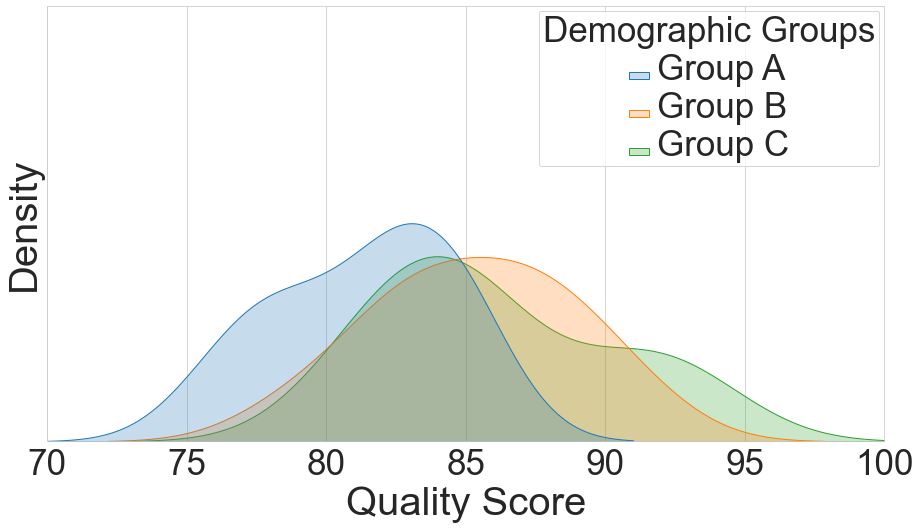

In [4]:
plt.figure(figsize=(15, 8))
plt.xlabel('Quality Score', fontsize=40)
plt.ylabel('Density', fontsize=40)
plt.xticks(fontsize=35)
plt.ylim([0,0.07])
plt.yticks([], [])
plt.xlim(70,100)

q1 = sns.kdeplot(data=df_Q1, x="Quality_Score", hue="Demographic Groups", fill=True)

# Adjust legend
plt.setp(q1.get_legend().get_texts(), fontsize='35');
plt.setp(q1.get_legend().get_title(), fontsize='35');

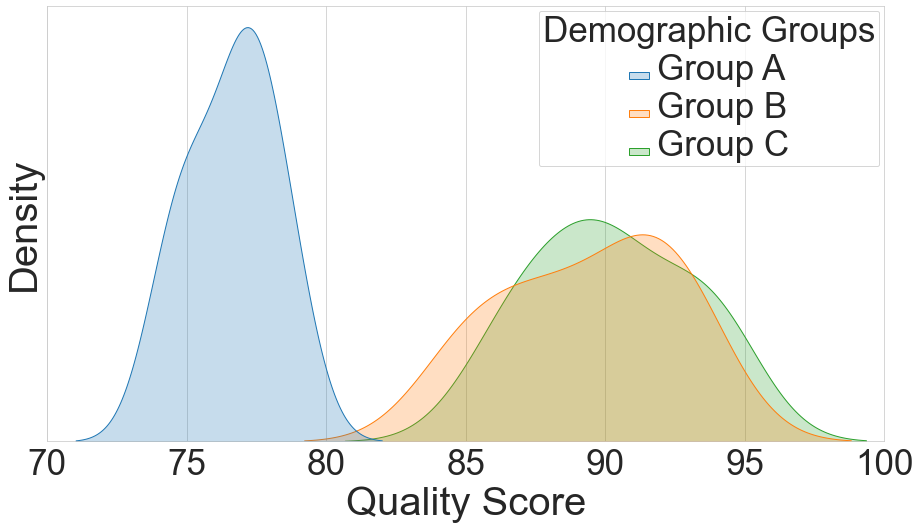

In [5]:
plt.figure(figsize=(15, 8))
plt.xlabel('Quality Score', fontsize=40)
plt.ylabel('Density', fontsize=40)
plt.xticks(fontsize=35)

q2 = sns.kdeplot(data=df_Q2, x="Quality_Score", hue="Demographic Groups", fill=True)

# Adjust legend
plt.xlim(70,100)
plt.yticks([], [])
plt.setp(q2.get_legend().get_texts(), fontsize='35'); # for legend text
plt.setp(q2.get_legend().get_title(), fontsize='35'); # for legend title

#### SQFR results for quality component Q1 and Q2 (see Paper Table 3) 

In [6]:
print("Results for Q1")
print("Mean Q1 Synthetic Example", round((1 - gini_coefficient([q1_Group_a_scores_mean,q1_Group_b_scores_mean, q1_Group_c_scores_mean])),2))
print("Median Q1 Synthetic Example", round((1 - gini_coefficient([q1_Group_a_scores_median,q1_Group_b_scores_median, q1_Group_c_scores_median])),2))
print("***********")
print("Results for Q2")
print("Mean Q2 Synthetic Example", round((1 - gini_coefficient([q2_Group_a_scores_mean,q2_Group_b_scores_mean, q2_Group_c_scores_mean])),2))
print("Median Q2 Synthetic Example", round((1 - gini_coefficient([q2_Group_a_scores_median,q2_Group_b_scores_median, q2_Group_c_scores_median])),2))

Results for Q1
Mean Q1 Synthetic Example 0.98
Median Q1 Synthetic Example 0.99
***********
Results for Q2
Mean Q2 Synthetic Example 0.95
Median Q2 Synthetic Example 0.95


#### Comparison of Mean-GC-SQFR and Mean-GC-CSQFR scores for different scenarios (see Paper Table 4)

In [7]:
mean_gc_sqfr_strong_bias = 1 - gini_coefficient([35,95,89])
mean_gc_sqfr_slight_bias = 1 - gini_coefficient([67,82,89])
mean_gc_sqfr_different_qs = 1 - gini_coefficient([30,50,95])
mean_gc_sqfr_similar_qs = 1 - gini_coefficient([84,89,87])


gc_csqfr_strong_bias = (1 - gini_coefficient([35,95,89]))**3
gc_csqfr_slight_bias = (1 - gini_coefficient([67,82,89]))**3
gc_csqfr_different_qs = (1 - gini_coefficient([30,50,95]))**3
gc_csqfr_similar_qs = (1 - gini_coefficient([84,89,87]))**3

print("Mean-GC-SQFR Strong Bias:",round(mean_gc_sqfr_strong_bias,2))
print("Mean-GC-CSQFR Strong Bias:",round(gc_csqfr_strong_bias,2))

print("Mean-GC-SQFR Slight Bias:",round(mean_gc_sqfr_slight_bias,2))
print("Mean-GC-CSQFR Slight Bias:",round(gc_csqfr_slight_bias,2))

print("Mean-GC-SQFR Different:",round(mean_gc_sqfr_different_qs,2))
print("Mean-GC-CSQFR Different:",round(gc_csqfr_different_qs,2))

print("Mean-GC-SQFR Similar:",round(mean_gc_sqfr_similar_qs,2))
print("Mean-GC-CSQFR Similar:",round(gc_csqfr_similar_qs,2))

Mean-GC-SQFR Strong Bias: 0.73
Mean-GC-CSQFR Strong Bias: 0.38
Mean-GC-SQFR Slight Bias: 0.91
Mean-GC-CSQFR Slight Bias: 0.75
Mean-GC-SQFR Different: 0.63
Mean-GC-CSQFR Different: 0.25
Mean-GC-SQFR Similar: 0.98
Mean-GC-CSQFR Similar: 0.94


#### LWM Advantage vs Mean-GC (Fictitious quality component Q3)

In [8]:
# Fictitious quality component Q3
synthetic_scores_Q3 = {
    "Demographic Groups": ["Group A"] * 20 + ["Group B"] * 20,
    "Quality_Score": [
        72, 72, 72, 73, 73, 73, 74, 74, 74, 75,  # Peak 1
        88, 89, 89, 90, 90, 91, 91, 92, 93, 94,  # Peak 2
        76, 77, 78, 79, 80, 80, 81, 81, 82, 82,  # Normal Distribution part 1
        83, 83, 84, 84, 85, 85, 86, 87, 88, 89   # Normal Distribution part 2
    ],
}

df_Q3 = pd.DataFrame(synthetic_scores_Q3)

q3_Group_b_scores = np.array(df_Q3[df_Q3["Demographic Groups"] == "Group B"]["Quality_Score"])
q3_Group_a_scores = np.array(df_Q3[df_Q3["Demographic Groups"] == "Group A"]["Quality_Score"])

q3_Group_b_scores_mean =df_Q3[df_Q3["Demographic Groups"] == "Group B"]["Quality_Score"].mean()
q3_Group_a_scores_mean =df_Q3[df_Q3["Demographic Groups"] == "Group A"]["Quality_Score"].mean()

q3_Group_b_scores_median =df_Q3[df_Q3["Demographic Groups"] == "Group B"]["Quality_Score"].median()
q3_Group_a_scores_median =df_Q3[df_Q3["Demographic Groups"] == "Group A"]["Quality_Score"].median()

#### Figures for the fictious quality components Q3 (See Paper Fig.4)

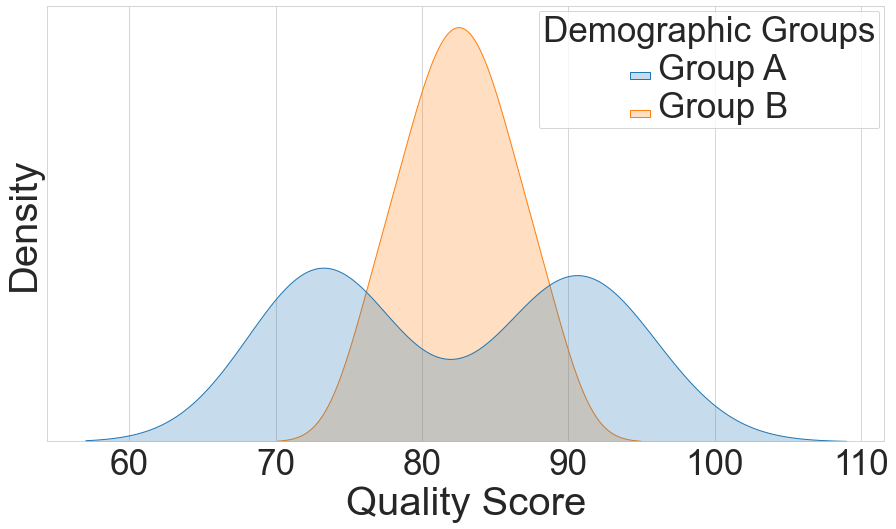

In [9]:
plt.figure(figsize=(15, 8))
plt.xlabel('Quality Score', fontsize=40)
plt.ylabel('Density', fontsize=40)
plt.xticks(fontsize=35)

q3 = sns.kdeplot(data=df_Q3, x="Quality_Score", hue="Demographic Groups", fill=True)

# Adjust legend
plt.yticks([], [])
plt.yticks([], [])
plt.setp(q3.get_legend().get_texts(), fontsize='35'); # for legend text
plt.setp(q3.get_legend().get_title(), fontsize='35'); # for legend title

#### SQFR results for quality component Q3 (see Paper Table 6)

In [10]:
q3_all_scores = np.concatenate([q3_Group_a_scores,q3_Group_b_scores])

lwm_q3_a = low_weighted_mean_score(q3_Group_a_scores, q3_all_scores)
lwm_q3_b = low_weighted_mean_score(q3_Group_b_scores, q3_all_scores)


print("Mean-GC-SQFR", round((1 - gini_coefficient([q3_Group_a_scores_mean,q3_Group_b_scores_mean])),3))
print("Median-GC-SQFR", round((1 - gini_coefficient([q3_Group_a_scores_median,q3_Group_b_scores_median])),3))
print("LWM-GC-SQFR", round((1 - gini_coefficient([lwm_q3_a, lwm_q3_b])),3))
print("LWM-GC-CSQFR", round((1 - gini_coefficient([lwm_q3_a, lwm_q3_b]))**3,3))

Mean-GC-SQFR 0.997
Median-GC-SQFR 0.994
LWM-GC-SQFR 0.962
LWM-GC-CSQFR 0.889


#### Mean Discard-Gap (MDG) Fictitious quality component Q5

In [11]:
# Fictitious quality component Q5
synthetic_scores_Q5 = {
    "Demographic Groups": ["Group A"] * 10 + ["Group B"] * 10 + ["Group C"] * 10,
    "Quality_Score": [
       69, 70, 71, 72, 72, 72, 73, 74, 74, 76,
       79, 81, 83, 83, 83, 84, 85, 85, 85, 89,
       87, 87, 88, 88, 90, 90, 92, 93, 94, 95
    ],
}

df_Q5 = pd.DataFrame(synthetic_scores_Q5)


q5_Group_a_scores = np.array(df_Q5[df_Q5["Demographic Groups"] == "Group A"]["Quality_Score"])
q5_Group_b_scores = np.array(df_Q5[df_Q5["Demographic Groups"] == "Group B"]["Quality_Score"])
q5_Group_c_scores = np.array(df_Q5[df_Q5["Demographic Groups"] == "Group C"]["Quality_Score"])


q5_Group_a_scores_mean =df_Q5[df_Q5["Demographic Groups"] == "Group A"]["Quality_Score"].mean()
q5_Group_b_scores_mean =df_Q5[df_Q5["Demographic Groups"] == "Group B"]["Quality_Score"].mean()
q5_Group_c_scores_mean =df_Q5[df_Q5["Demographic Groups"] == "Group C"]["Quality_Score"].mean()

q5_Group_a_scores_median =df_Q5[df_Q5["Demographic Groups"] == "Group A"]["Quality_Score"].median()
q5_Group_b_scores_median =df_Q5[df_Q5["Demographic Groups"] == "Group B"]["Quality_Score"].median()
q5_Group_c_scores_median =df_Q5[df_Q5["Demographic Groups"] == "Group C"]["Quality_Score"].median()


### Fictitious quality component Q5: KDE Plot of the demographic score distribution (see Paper Figure 5)

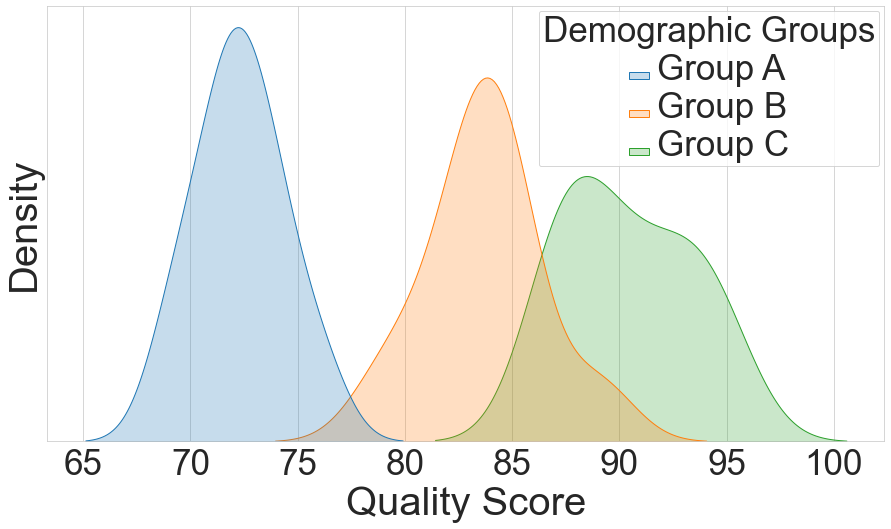

In [12]:
plt.figure(figsize=(15, 8))
plt.xlabel('Quality Score', fontsize=40)
plt.ylabel('Density', fontsize=40)
plt.xticks(fontsize=35)

q5 = sns.kdeplot(data=df_Q5, x="Quality_Score", hue="Demographic Groups", fill=True)
# Adjust legend
plt.yticks([], [])
plt.setp(q5.get_legend().get_texts(), fontsize='35');
plt.setp(q5.get_legend().get_title(), fontsize='35');


#### SQFR results for quality component Q5 (see Paper Table 8)

In [13]:
group_a = np.array([69, 70, 71, 72, 72, 72, 73, 74, 74, 76,]) 
group_b = np.array([79, 81, 83, 83, 83, 84, 85, 85, 85, 89,])
group_c = np.array([87, 87, 88, 88, 90, 90, 92, 93, 94, 95])

q5_all_scores = np.concatenate([q5_Group_a_scores,q5_Group_b_scores,q5_Group_c_scores])


# Calculate MDG Score
all_scores = [group_a, group_b, group_c]
mean_min_max_distance = mean_discard_gap(all_scores)


# Calculate LWM Scores
lwm_q5_a = low_weighted_mean_score(q5_Group_a_scores,q5_all_scores)
lwm_q5_b = low_weighted_mean_score(q5_Group_b_scores,q5_all_scores)
lwm_q5_c = low_weighted_mean_score(q5_Group_c_scores,q5_all_scores)

print("Mean-GC-SQFR", round((1 - gini_coefficient([q5_Group_a_scores_mean,q5_Group_b_scores_mean, q5_Group_c_scores_mean])),2))
print("Median-GC-SQFR", round((1 - gini_coefficient([q5_Group_a_scores_median,q5_Group_b_scores_median, q5_Group_c_scores_median])),2))
print("LWM-GC-SQFR", round((1 - gini_coefficient([lwm_q5_a, lwm_q5_b, lwm_q5_c])),2))
print("LWM-GC-QSQFR", round((1 - gini_coefficient([lwm_q5_a, lwm_q5_b, lwm_q5_c]))**3,2))
print(f"MDG-SQFR: {1 -mean_min_max_distance:.2f}")


Mean-GC-SQFR 0.93
Median-GC-SQFR 0.93
LWM-GC-SQFR 0.93
LWM-GC-QSQFR 0.81
MDG-SQFR: 0.30


#### Comparison of proposed SQFR scores for different scenarios of 5 groups (Table 9)

In [14]:
# Q6 Scores column 1: "One has strong bias"
synthetic_scores_Q6_one_strongly_biased = {
    "Demographic Groups": ["Group A"] * 10 + ["Group B"] * 10 + ["Group C"] * 10 + ["Group D"] * 10 + ["Group E"] * 10,
    "Quality_Score": [
       28, 29, 30, 31, 31, 32, 32, 33, 34, 34,
       82, 83, 83, 84, 84, 84, 85, 86, 86, 87,
       81, 82, 82, 84, 84, 86, 87, 87, 88, 88,
       79, 79, 82, 82, 85, 87, 88, 89, 89, 92,
       83, 83, 84, 85, 86, 87, 88, 89, 91, 92,
    ],
}

df_Q6_one_strongly_biased= pd.DataFrame(synthetic_scores_Q6_one_strongly_biased)


q6_Group_a_scores = np.array(df_Q6_one_strongly_biased[df_Q6_one_strongly_biased["Demographic Groups"] == "Group A"]["Quality_Score"])
q6_Group_b_scores = np.array(df_Q6_one_strongly_biased[df_Q6_one_strongly_biased["Demographic Groups"] == "Group B"]["Quality_Score"])
q6_Group_c_scores = np.array(df_Q6_one_strongly_biased[df_Q6_one_strongly_biased["Demographic Groups"] == "Group C"]["Quality_Score"])
q6_Group_d_scores = np.array(df_Q6_one_strongly_biased[df_Q6_one_strongly_biased["Demographic Groups"] == "Group D"]["Quality_Score"])
q6_Group_e_scores = np.array(df_Q6_one_strongly_biased[df_Q6_one_strongly_biased["Demographic Groups"] == "Group E"]["Quality_Score"])
q6_all_scores_one_strongly_biased = np.concatenate([q6_Group_a_scores, q6_Group_b_scores,q6_Group_c_scores, q6_Group_d_scores,q6_Group_e_scores])


q6_Group_a_scores_mean = df_Q6_one_strongly_biased[df_Q6_one_strongly_biased["Demographic Groups"] == "Group A"]["Quality_Score"].mean()
q6_Group_b_scores_mean = df_Q6_one_strongly_biased[df_Q6_one_strongly_biased["Demographic Groups"] == "Group B"]["Quality_Score"].mean()
q6_Group_c_scores_mean = df_Q6_one_strongly_biased[df_Q6_one_strongly_biased["Demographic Groups"] == "Group C"]["Quality_Score"].mean()
q6_Group_d_scores_mean = df_Q6_one_strongly_biased[df_Q6_one_strongly_biased["Demographic Groups"] == "Group D"]["Quality_Score"].mean()
q6_Group_e_scores_mean = df_Q6_one_strongly_biased[df_Q6_one_strongly_biased["Demographic Groups"] == "Group E"]["Quality_Score"].mean()


# LWM Scores
lwm_q6_one_strongly_biased_bias_a = low_weighted_mean_score(q6_Group_a_scores, q6_all_scores_one_strongly_biased)
lwm_q6_one_strongly_biased_bias_b = low_weighted_mean_score(q6_Group_b_scores, q6_all_scores_one_strongly_biased)
lwm_q6_one_strongly_biased_bias_c = low_weighted_mean_score(q6_Group_c_scores, q6_all_scores_one_strongly_biased)
lwm_q6_one_strongly_biased_bias_d = low_weighted_mean_score(q6_Group_d_scores, q6_all_scores_one_strongly_biased)
lwm_q6_one_strongly_biased_bias_e = low_weighted_mean_score(q6_Group_e_scores, q6_all_scores_one_strongly_biased)


# MDPG Calculation
q6_one_bias_all_scores = [q6_Group_a_scores,q6_Group_b_scores,q6_Group_c_scores,q6_Group_d_scores, q6_Group_e_scores]
mean_min_max_distance = mean_discard_gap(q6_one_bias_all_scores)

print("Mean-GC-SQFR Q6 one strong bias", round((1 - gini_coefficient([q6_Group_a_scores_mean,q6_Group_b_scores_mean, q6_Group_c_scores_mean, q6_Group_d_scores_mean, q6_Group_e_scores_mean])),2))
print("Mean-GC-CSQFR Q6 one strong bias", round((1 - gini_coefficient([q6_Group_a_scores_mean,q6_Group_b_scores_mean, q6_Group_c_scores_mean, q6_Group_d_scores_mean, q6_Group_e_scores_mean]))**3,2))
print("LWM-GC-SQFR Q6 one strong bias", round((1 - gini_coefficient([lwm_q6_one_strongly_biased_bias_a,lwm_q6_one_strongly_biased_bias_b, lwm_q6_one_strongly_biased_bias_c, lwm_q6_one_strongly_biased_bias_d, lwm_q6_one_strongly_biased_bias_e])),2))
print("LWM-GC-CSQFR Q6 one strong bias", round((1 - gini_coefficient([lwm_q6_one_strongly_biased_bias_a,lwm_q6_one_strongly_biased_bias_b, lwm_q6_one_strongly_biased_bias_c, lwm_q6_one_strongly_biased_bias_d, lwm_q6_one_strongly_biased_bias_e]))**3,2))
print(f"MDG-SQFR Q6 one strong bias: {1 - mean_min_max_distance:.2f}")


Mean-GC-SQFR Q6 one strong bias 0.85
Mean-GC-CSQFR Q6 one strong bias 0.61
LWM-GC-SQFR Q6 one strong bias 0.85
LWM-GC-CSQFR Q6 one strong bias 0.62
MDG-SQFR Q6 one strong bias: 0.13


In [15]:
# Q6 Scores column 2: "Two have strong bias"
synthetic_scores_Q6_two_strongly_biased = {
    "Demographic Groups": ["Group A"] * 10 + ["Group B"] * 10 + ["Group C"] * 10 + ["Group D"] * 10 + ["Group E"] * 10,
    "Quality_Score": [
       28, 28, 28, 31, 31, 32, 32, 33, 34, 34,
       24, 24, 24, 26, 26, 27, 28, 29, 29, 30,
       82, 82, 82, 84, 84, 86, 87, 87, 88, 88,
       78, 79, 82, 82, 85, 87, 88, 89, 89, 92,
       83, 83, 84, 85, 86, 87, 88, 90, 92, 93,
    ],
}

df_Q6_two_strongly_biased= pd.DataFrame(synthetic_scores_Q6_two_strongly_biased)


q6_Group_a_scores = np.array(df_Q6_two_strongly_biased[df_Q6_two_strongly_biased["Demographic Groups"] == "Group A"]["Quality_Score"])
q6_Group_b_scores = np.array(df_Q6_two_strongly_biased[df_Q6_two_strongly_biased["Demographic Groups"] == "Group B"]["Quality_Score"])
q6_Group_c_scores = np.array(df_Q6_two_strongly_biased[df_Q6_two_strongly_biased["Demographic Groups"] == "Group C"]["Quality_Score"])
q6_Group_d_scores = np.array(df_Q6_two_strongly_biased[df_Q6_two_strongly_biased["Demographic Groups"] == "Group D"]["Quality_Score"])
q6_Group_e_scores = np.array(df_Q6_two_strongly_biased[df_Q6_two_strongly_biased["Demographic Groups"] == "Group E"]["Quality_Score"])

q6_all_scores_two_strongly_biased = np.concatenate([q6_Group_a_scores, q6_Group_b_scores,q6_Group_c_scores, q6_Group_d_scores,q6_Group_e_scores])


q6_Group_a_scores_mean = df_Q6_two_strongly_biased[df_Q6_two_strongly_biased["Demographic Groups"] == "Group A"]["Quality_Score"].mean()
q6_Group_b_scores_mean = df_Q6_two_strongly_biased[df_Q6_two_strongly_biased["Demographic Groups"] == "Group B"]["Quality_Score"].mean()
q6_Group_c_scores_mean = df_Q6_two_strongly_biased[df_Q6_two_strongly_biased["Demographic Groups"] == "Group C"]["Quality_Score"].mean()
q6_Group_d_scores_mean = df_Q6_two_strongly_biased[df_Q6_two_strongly_biased["Demographic Groups"] == "Group D"]["Quality_Score"].mean()
q6_Group_e_scores_mean = df_Q6_two_strongly_biased[df_Q6_two_strongly_biased["Demographic Groups"] == "Group E"]["Quality_Score"].mean()


# LWM Scores
lwm_q6_two_strongly_biased_a = low_weighted_mean_score(q6_Group_a_scores, q6_all_scores_two_strongly_biased)
lwm_q6_two_strongly_biased_b = low_weighted_mean_score(q6_Group_b_scores, q6_all_scores_two_strongly_biased)
lwm_q6_two_strongly_biased_c = low_weighted_mean_score(q6_Group_c_scores, q6_all_scores_two_strongly_biased)
lwm_q6_two_strongly_biased_d = low_weighted_mean_score(q6_Group_d_scores, q6_all_scores_two_strongly_biased)
lwm_q6_two_strongly_biased_e = low_weighted_mean_score(q6_Group_e_scores, q6_all_scores_two_strongly_biased)


# MDPG Calculation
q6_two_bias_all_scores = [q6_Group_a_scores,q6_Group_b_scores,q6_Group_c_scores,q6_Group_d_scores, q6_Group_e_scores]
mean_min_max_distance = mean_discard_gap(q6_two_bias_all_scores)

print("Mean-GC-SQFR Q6 two strong bias", round((1 - gini_coefficient([q6_Group_a_scores_mean,q6_Group_b_scores_mean, q6_Group_c_scores_mean, q6_Group_d_scores_mean, q6_Group_e_scores_mean])),2))
print("Mean-GC-CSQFR Q6 two strong bias", round((1 - gini_coefficient([q6_Group_a_scores_mean,q6_Group_b_scores_mean, q6_Group_c_scores_mean, q6_Group_d_scores_mean, q6_Group_e_scores_mean]))**3,2))
print("LWM-GC-SQFR Q6 two strong bias", round((1 - gini_coefficient([lwm_q6_two_strongly_biased_a,lwm_q6_two_strongly_biased_b, lwm_q6_two_strongly_biased_c, lwm_q6_two_strongly_biased_d, lwm_q6_two_strongly_biased_e])),2))
print("LWM-GC-CSQFR Q6 two strong bias", round((1 - gini_coefficient([lwm_q6_two_strongly_biased_a,lwm_q6_two_strongly_biased_b, lwm_q6_two_strongly_biased_c, lwm_q6_two_strongly_biased_d, lwm_q6_two_strongly_biased_e]))**3,2))
print(f"MDG-SQFR Q6 two strong bias: {1 - mean_min_max_distance:.2f}")

Mean-GC-SQFR Q6 two strong bias 0.72
Mean-GC-CSQFR Q6 two strong bias 0.38
LWM-GC-SQFR Q6 two strong bias 0.73
LWM-GC-CSQFR Q6 two strong bias 0.38
MDG-SQFR Q6 two strong bias: 0.12


In [16]:
# Q6 Scores column 3: "One has slight bias"
synthetic_scores_Q6_one_slight_biased = {
    "Demographic Groups": ["Group A"] * 10 + ["Group B"] * 10 + ["Group C"] * 10 + ["Group D"] * 10 + ["Group E"] * 10,
    "Quality_Score": [
       76, 76, 77, 77, 78, 79, 80, 82, 82, 84,
       84, 84, 84, 84, 85, 85, 87, 87, 88, 88,
       82, 82, 82, 84, 84, 86, 87, 87, 88, 88,
       78, 79, 82, 82, 85, 87, 88, 89, 89, 92,
       83, 83, 84, 85, 86, 87, 87, 89, 92, 93,
    ],
}

df_Q6_one_slight_biased= pd.DataFrame(synthetic_scores_Q6_one_slight_biased)


q6_Group_a_scores = np.array(df_Q6_one_slight_biased[df_Q6_one_slight_biased["Demographic Groups"] == "Group A"]["Quality_Score"])
q6_Group_b_scores = np.array(df_Q6_one_slight_biased[df_Q6_one_slight_biased["Demographic Groups"] == "Group B"]["Quality_Score"])
q6_Group_c_scores = np.array(df_Q6_one_slight_biased[df_Q6_one_slight_biased["Demographic Groups"] == "Group C"]["Quality_Score"])
q6_Group_d_scores = np.array(df_Q6_one_slight_biased[df_Q6_one_slight_biased["Demographic Groups"] == "Group D"]["Quality_Score"])
q6_Group_e_scores = np.array(df_Q6_one_slight_biased[df_Q6_one_slight_biased["Demographic Groups"] == "Group E"]["Quality_Score"])

q6_all_scores_one_slight_biased = np.concatenate([q6_Group_a_scores, q6_Group_b_scores,q6_Group_c_scores, q6_Group_d_scores,q6_Group_e_scores])


q6_Group_a_scores_mean = df_Q6_one_slight_biased[df_Q6_one_slight_biased["Demographic Groups"] == "Group A"]["Quality_Score"].mean()
q6_Group_b_scores_mean = df_Q6_one_slight_biased[df_Q6_one_slight_biased["Demographic Groups"] == "Group B"]["Quality_Score"].mean()
q6_Group_c_scores_mean = df_Q6_one_slight_biased[df_Q6_one_slight_biased["Demographic Groups"] == "Group C"]["Quality_Score"].mean()
q6_Group_d_scores_mean = df_Q6_one_slight_biased[df_Q6_one_slight_biased["Demographic Groups"] == "Group D"]["Quality_Score"].mean()
q6_Group_e_scores_mean = df_Q6_one_slight_biased[df_Q6_one_slight_biased["Demographic Groups"] == "Group E"]["Quality_Score"].mean()


# LWM Calculation
lwm_q6_one_slight_biased_a = low_weighted_mean_score(q6_Group_a_scores, q6_all_scores_one_slight_biased)
lwm_q6_one_slight_biased_b = low_weighted_mean_score(q6_Group_b_scores, q6_all_scores_one_slight_biased)
lwm_q6_one_slight_biased_c = low_weighted_mean_score(q6_Group_c_scores, q6_all_scores_one_slight_biased)
lwm_q6_one_slight_biased_d = low_weighted_mean_score(q6_Group_d_scores, q6_all_scores_one_slight_biased)
lwm_q6_one_slight_biased_e = low_weighted_mean_score(q6_Group_e_scores, q6_all_scores_one_slight_biased)


# MDPG Calculation
q6_one_slight_all_scores = [q6_Group_a_scores,q6_Group_b_scores,q6_Group_c_scores,q6_Group_d_scores, q6_Group_e_scores]
mean_min_max_distance = mean_discard_gap(q6_one_slight_all_scores)

print("Mean-GC-SQFR Q6 one slight bias", round((1 - gini_coefficient([q6_Group_a_scores_mean,q6_Group_b_scores_mean, q6_Group_c_scores_mean, q6_Group_d_scores_mean, q6_Group_e_scores_mean])),2))
print("Mean-GC-CSQFR Q6 one slight bias", round((1 - gini_coefficient([q6_Group_a_scores_mean,q6_Group_b_scores_mean, q6_Group_c_scores_mean, q6_Group_d_scores_mean, q6_Group_e_scores_mean]))**3,2))
print("LWM-GC-SQFR Q6 one slight bias", round((1 - gini_coefficient([lwm_q6_one_slight_biased_a,lwm_q6_one_slight_biased_b, lwm_q6_one_slight_biased_c, lwm_q6_one_slight_biased_d, lwm_q6_one_slight_biased_e])),2))
print("LWM-GC-CSQFR Q6 one slight bias", round((1 - gini_coefficient([lwm_q6_one_slight_biased_a,lwm_q6_one_slight_biased_b, lwm_q6_one_slight_biased_c, lwm_q6_one_slight_biased_d, lwm_q6_one_slight_biased_e]))**3,2))
print(f"MDP-SQFR Q6 one slight bias: {1 - mean_min_max_distance:.2f}")

Mean-GC-SQFR Q6 one slight bias 0.98
Mean-GC-CSQFR Q6 one slight bias 0.94
LWM-GC-SQFR Q6 one slight bias 0.98
LWM-GC-CSQFR Q6 one slight bias 0.94
MDP-SQFR Q6 one slight bias: 0.52


In [17]:
# Q6 Scores column 4: "Two have slight bias"
synthetic_scores_Q6_two_slight_biased = {
    "Demographic Groups": ["Group A"] * 10 + ["Group B"] * 10 + ["Group C"] * 10 + ["Group D"] * 10 + ["Group E"] * 10,
    "Quality_Score": [
       72, 73, 74, 75, 75, 76, 77, 78, 79, 81,
       74, 75, 76, 77, 78, 79, 78, 78, 78, 82,
       82, 83, 84, 85, 86, 86, 87, 87, 88, 88,
       83, 83, 84, 85, 86, 87, 87, 89, 92, 93,
       84, 84, 84, 86, 86, 87, 86, 87, 87, 87,
    ],
}

df_Q6_two_slight_biased= pd.DataFrame(synthetic_scores_Q6_two_slight_biased)


q6_Group_a_scores = np.array(df_Q6_two_slight_biased[df_Q6_two_slight_biased["Demographic Groups"] == "Group A"]["Quality_Score"])
q6_Group_b_scores = np.array(df_Q6_two_slight_biased[df_Q6_two_slight_biased["Demographic Groups"] == "Group B"]["Quality_Score"])
q6_Group_c_scores = np.array(df_Q6_two_slight_biased[df_Q6_two_slight_biased["Demographic Groups"] == "Group C"]["Quality_Score"])
q6_Group_d_scores = np.array(df_Q6_two_slight_biased[df_Q6_two_slight_biased["Demographic Groups"] == "Group D"]["Quality_Score"])
q6_Group_e_scores = np.array(df_Q6_two_slight_biased[df_Q6_two_slight_biased["Demographic Groups"] == "Group E"]["Quality_Score"])

q6_all_scores_two_slight_biased = np.concatenate([q6_Group_a_scores, q6_Group_b_scores,q6_Group_c_scores, q6_Group_d_scores,q6_Group_e_scores])


q6_Group_a_scores_mean = df_Q6_two_slight_biased[df_Q6_two_slight_biased["Demographic Groups"] == "Group A"]["Quality_Score"].mean()
q6_Group_b_scores_mean = df_Q6_two_slight_biased[df_Q6_two_slight_biased["Demographic Groups"] == "Group B"]["Quality_Score"].mean()
q6_Group_c_scores_mean = df_Q6_two_slight_biased[df_Q6_two_slight_biased["Demographic Groups"] == "Group C"]["Quality_Score"].mean()
q6_Group_d_scores_mean = df_Q6_two_slight_biased[df_Q6_two_slight_biased["Demographic Groups"] == "Group D"]["Quality_Score"].mean()
q6_Group_e_scores_mean = df_Q6_two_slight_biased[df_Q6_two_slight_biased["Demographic Groups"] == "Group E"]["Quality_Score"].mean()


# LWM Calculation
lwm_q6_two_slight_biased_a = low_weighted_mean_score(q6_Group_a_scores, q6_all_scores_two_slight_biased)
lwm_q6_two_slight_biased_b = low_weighted_mean_score(q6_Group_b_scores, q6_all_scores_two_slight_biased)
lwm_q6_two_slight_biased_c = low_weighted_mean_score(q6_Group_c_scores, q6_all_scores_two_slight_biased)
lwm_q6_two_slight_biased_d = low_weighted_mean_score(q6_Group_d_scores, q6_all_scores_two_slight_biased)
lwm_q6_two_slight_biased_e = low_weighted_mean_score(q6_Group_e_scores, q6_all_scores_two_slight_biased)


# MDPG Calculation
q6_two_slight_all_scores = [q6_Group_a_scores,q6_Group_b_scores,q6_Group_c_scores,q6_Group_d_scores, q6_Group_e_scores]
mean_min_max_distance = mean_discard_gap(q6_two_slight_all_scores)

print("Mean-GC-SQFR Q6 two slight bias", round((1 - gini_coefficient([q6_Group_a_scores_mean,q6_Group_b_scores_mean, q6_Group_c_scores_mean, q6_Group_d_scores_mean, q6_Group_e_scores_mean])),2))
print("Mean-GC-CSQFR Q6 two slight bias", round((1 - gini_coefficient([q6_Group_a_scores_mean,q6_Group_b_scores_mean, q6_Group_c_scores_mean, q6_Group_d_scores_mean, q6_Group_e_scores_mean]))**3,2))
print("LWM-GC-SQFR Q6 two slight bias", round((1 - gini_coefficient([lwm_q6_two_slight_biased_a,lwm_q6_two_slight_biased_b, lwm_q6_two_slight_biased_c, lwm_q6_two_slight_biased_d, lwm_q6_two_slight_biased_e])),2))
print("LWM-GC-CSQFR Q6 two slight bias", round((1 - gini_coefficient([lwm_q6_two_slight_biased_a,lwm_q6_two_slight_biased_b, lwm_q6_two_slight_biased_c, lwm_q6_two_slight_biased_d, lwm_q6_two_slight_biased_e]))**3,2))
print(f"MDG-SQFR Q6 two slight bias {1 - mean_min_max_distance:.2f}")



Mean-GC-SQFR Q6 two slight bias 0.96
Mean-GC-CSQFR Q6 two slight bias 0.89
LWM-GC-SQFR Q6 two slight bias 0.97
LWM-GC-CSQFR Q6 two slight bias 0.9
MDG-SQFR Q6 two slight bias 0.47


In [18]:
# Q6 Scores column 5: "All have similar QSs"
synthetic_scores_Q6_all_similar = {
    "Demographic Groups": ["Group A"] * 10 + ["Group B"] * 10 + ["Group C"] * 10 + ["Group D"] * 10 + ["Group E"] * 10,
    "Quality_Score": [
       84, 85, 86, 86, 86, 86, 86, 86, 86, 86,
       87, 87, 87, 87, 87, 88, 88, 88, 88, 88,
       82, 83, 84, 85, 86, 86, 87, 87, 88, 88,
       83, 83, 84, 85, 86, 87, 87, 89, 89, 93,
       85, 85, 86, 86, 86, 87, 87, 87, 88, 88,
    ],
}

df_Q6_all_similar= pd.DataFrame(synthetic_scores_Q6_all_similar)


q6_Group_a_scores = np.array(df_Q6_all_similar[df_Q6_all_similar["Demographic Groups"] == "Group A"]["Quality_Score"])
q6_Group_b_scores = np.array(df_Q6_all_similar[df_Q6_all_similar["Demographic Groups"] == "Group B"]["Quality_Score"])
q6_Group_c_scores = np.array(df_Q6_all_similar[df_Q6_all_similar["Demographic Groups"] == "Group C"]["Quality_Score"])
q6_Group_d_scores = np.array(df_Q6_all_similar[df_Q6_all_similar["Demographic Groups"] == "Group D"]["Quality_Score"])
q6_Group_e_scores = np.array(df_Q6_all_similar[df_Q6_all_similar["Demographic Groups"] == "Group E"]["Quality_Score"])

q6_all_scores_all_similar = np.concatenate([q6_Group_a_scores, q6_Group_b_scores,q6_Group_c_scores, q6_Group_d_scores,q6_Group_e_scores])


q6_Group_a_scores_mean = df_Q6_all_similar[df_Q6_all_similar["Demographic Groups"] == "Group A"]["Quality_Score"].mean()
q6_Group_b_scores_mean = df_Q6_all_similar[df_Q6_all_similar["Demographic Groups"] == "Group B"]["Quality_Score"].mean()
q6_Group_c_scores_mean = df_Q6_all_similar[df_Q6_all_similar["Demographic Groups"] == "Group C"]["Quality_Score"].mean()
q6_Group_d_scores_mean = df_Q6_all_similar[df_Q6_all_similar["Demographic Groups"] == "Group D"]["Quality_Score"].mean()
q6_Group_e_scores_mean = df_Q6_all_similar[df_Q6_all_similar["Demographic Groups"] == "Group E"]["Quality_Score"].mean()


# LWM Calculation
lwm_q6_all_similar_a = low_weighted_mean_score(q6_Group_a_scores, q6_all_scores_all_similar)
lwm_q6_all_similar_b = low_weighted_mean_score(q6_Group_b_scores, q6_all_scores_all_similar)
lwm_q6_all_similar_c = low_weighted_mean_score(q6_Group_c_scores, q6_all_scores_all_similar)
lwm_q6_all_similar_d = low_weighted_mean_score(q6_Group_d_scores, q6_all_scores_all_similar)
lwm_q6_all_similar_e = low_weighted_mean_score(q6_Group_e_scores, q6_all_scores_all_similar)


# MDPG Calculation
q6_all_similar_all_scores = [q6_Group_a_scores,q6_Group_b_scores,q6_Group_c_scores,q6_Group_d_scores, q6_Group_e_scores]
mean_min_max_distance = mean_discard_gap(q6_all_similar_all_scores)

print("Mean-GC-SQFR Q6 all_similar", round((1 - gini_coefficient([q6_Group_a_scores_mean,q6_Group_b_scores_mean, q6_Group_c_scores_mean, q6_Group_d_scores_mean, q6_Group_e_scores_mean])),2))
print("Mean-GC-CSQFR Q6 all_similar", round((1 - gini_coefficient([q6_Group_a_scores_mean,q6_Group_b_scores_mean, q6_Group_c_scores_mean, q6_Group_d_scores_mean, q6_Group_e_scores_mean]))**3,2))
print("LWM-GC-SQFR Q6 all_similar", round((1 - gini_coefficient([lwm_q6_all_similar_a,lwm_q6_all_similar_b, lwm_q6_all_similar_c, lwm_q6_all_similar_d, lwm_q6_all_similar_e])),2))
print("LWM-GC-CSQFR Q6 all_similar", round((1 - gini_coefficient([lwm_q6_all_similar_a,lwm_q6_all_similar_b, lwm_q6_all_similar_c, lwm_q6_all_similar_d, lwm_q6_all_similar_e]))**3,2))
print(f"MDG-SQFR Q6 all_similar: {1 - mean_min_max_distance:.2f}")

Mean-GC-SQFR Q6 all_similar 0.99
Mean-GC-CSQFR Q6 all_similar 0.98
LWM-GC-SQFR Q6 all_similar 0.99
LWM-GC-CSQFR Q6 all_similar 0.98
MDG-SQFR Q6 all_similar: 0.71


In [19]:
# Q6 Scores column 5: "All have equal QSs"
synthetic_scores_Q6_all_equal = {
    "Demographic Groups": ["Group A"] * 10 + ["Group B"] * 10 + ["Group C"] * 10 + ["Group D"] * 10 + ["Group E"] * 10,
    "Quality_Score": [
       87, 87, 87, 87, 87, 88, 88, 88, 88, 88,
       87, 87, 87, 87, 87, 88, 88, 88, 88, 88,
       87, 87, 87, 87, 87, 88, 88, 88, 88, 88,
       87, 87, 87, 87, 87, 88, 88, 88, 88, 88,
       87, 87, 87, 87, 87, 88, 88, 88, 88, 88,
    ],
}

df_Q6_all_equal= pd.DataFrame(synthetic_scores_Q6_all_equal)


q6_Group_a_scores = np.array(df_Q6_all_equal[df_Q6_all_equal["Demographic Groups"] == "Group A"]["Quality_Score"])
q6_Group_b_scores = np.array(df_Q6_all_equal[df_Q6_all_equal["Demographic Groups"] == "Group B"]["Quality_Score"])
q6_Group_c_scores = np.array(df_Q6_all_equal[df_Q6_all_equal["Demographic Groups"] == "Group C"]["Quality_Score"])
q6_Group_d_scores = np.array(df_Q6_all_equal[df_Q6_all_equal["Demographic Groups"] == "Group D"]["Quality_Score"])
q6_Group_e_scores = np.array(df_Q6_all_equal[df_Q6_all_equal["Demographic Groups"] == "Group E"]["Quality_Score"])

q6_all_scores_all_equal = np.concatenate([q6_Group_a_scores, q6_Group_b_scores,q6_Group_c_scores, q6_Group_d_scores,q6_Group_e_scores])


q6_Group_a_scores_mean = df_Q6_all_equal[df_Q6_all_equal["Demographic Groups"] == "Group A"]["Quality_Score"].mean()
q6_Group_b_scores_mean = df_Q6_all_equal[df_Q6_all_equal["Demographic Groups"] == "Group B"]["Quality_Score"].mean()
q6_Group_c_scores_mean = df_Q6_all_equal[df_Q6_all_equal["Demographic Groups"] == "Group C"]["Quality_Score"].mean()
q6_Group_d_scores_mean = df_Q6_all_equal[df_Q6_all_equal["Demographic Groups"] == "Group D"]["Quality_Score"].mean()
q6_Group_e_scores_mean = df_Q6_all_equal[df_Q6_all_equal["Demographic Groups"] == "Group E"]["Quality_Score"].mean()


# LWM Calculation
lwm_q6_all_equal_a = low_weighted_mean_score(q6_Group_a_scores, q6_all_scores_all_equal)
lwm_q6_all_equal_b = low_weighted_mean_score(q6_Group_b_scores, q6_all_scores_all_equal)
lwm_q6_all_equal_c = low_weighted_mean_score(q6_Group_c_scores, q6_all_scores_all_equal)
lwm_q6_all_equal_d = low_weighted_mean_score(q6_Group_d_scores, q6_all_scores_all_equal)
lwm_q6_all_equal_e = low_weighted_mean_score(q6_Group_e_scores, q6_all_scores_all_equal)


# MDPG Calculation
q6_all_equal_all_scores = [q6_Group_a_scores,q6_Group_b_scores,q6_Group_c_scores,q6_Group_d_scores, q6_Group_e_scores]
mean_min_max_distance = mean_discard_gap(q6_all_equal_all_scores)

print("Mean-GC-SQFR Q6 all_equal", round((1 - gini_coefficient([q6_Group_a_scores_mean,q6_Group_b_scores_mean, q6_Group_c_scores_mean, q6_Group_d_scores_mean, q6_Group_e_scores_mean])),2))
print("Mean-GC-CSQFR Q6 all_equal", round((1 - gini_coefficient([q6_Group_a_scores_mean,q6_Group_b_scores_mean, q6_Group_c_scores_mean, q6_Group_d_scores_mean, q6_Group_e_scores_mean]))**3,2))
print("LWM-GC-SQFR Q6 all_equal", round((1 - gini_coefficient([lwm_q6_all_equal_a,lwm_q6_all_equal_b, lwm_q6_all_equal_c, lwm_q6_all_equal_d, lwm_q6_all_equal_e])),2))
print("LWM-GC-CSQFR Q6 all_equal", round((1 - gini_coefficient([lwm_q6_all_equal_a,lwm_q6_all_equal_b, lwm_q6_all_equal_c, lwm_q6_all_equal_d, lwm_q6_all_equal_e]))**3,2))
print(f"MDG-SQFR Q6 all_equal: {1 - mean_min_max_distance:.2f}")

Mean-GC-SQFR Q6 all_equal 1.0
Mean-GC-CSQFR Q6 all_equal 1.0
LWM-GC-SQFR Q6 all_equal 1.0
LWM-GC-CSQFR Q6 all_equal 1.0
MDG-SQFR Q6 all_equal: 1.00


In [20]:
# All have different QSs
synthetic_scores_Q6_all_different = {
    "Demographic Groups": ["Group A"] * 10 + ["Group B"] * 10 + ["Group C"] * 10 + ["Group D"] * 10 + ["Group E"] * 10,
    "Quality_Score": [
       87, 87, 87, 87, 87, 88, 88, 88, 88, 88,
       70, 71, 72, 72, 72, 73, 73, 73, 73, 73,
       23, 23, 23, 25, 25, 25, 25, 26, 27, 28,
       10, 12, 12, 13, 15, 15, 16, 16, 17, 17,
       45, 46, 46, 46, 46, 47, 48, 49, 50, 50,
    ],
}

df_Q6_all_different= pd.DataFrame(synthetic_scores_Q6_all_different)


q6_Group_a_scores = np.array(df_Q6_all_different[df_Q6_all_different["Demographic Groups"] == "Group A"]["Quality_Score"])
q6_Group_b_scores = np.array(df_Q6_all_different[df_Q6_all_different["Demographic Groups"] == "Group B"]["Quality_Score"])
q6_Group_c_scores = np.array(df_Q6_all_different[df_Q6_all_different["Demographic Groups"] == "Group C"]["Quality_Score"])
q6_Group_d_scores = np.array(df_Q6_all_different[df_Q6_all_different["Demographic Groups"] == "Group D"]["Quality_Score"])
q6_Group_e_scores = np.array(df_Q6_all_different[df_Q6_all_different["Demographic Groups"] == "Group E"]["Quality_Score"])

q6_all_scores_all_different = np.concatenate([q6_Group_a_scores, q6_Group_b_scores,q6_Group_c_scores, q6_Group_d_scores,q6_Group_e_scores])


q6_Group_a_scores_mean =df_Q6_all_different[df_Q6_all_different["Demographic Groups"] == "Group A"]["Quality_Score"].mean()
q6_Group_b_scores_mean =df_Q6_all_different[df_Q6_all_different["Demographic Groups"] == "Group B"]["Quality_Score"].mean()
q6_Group_c_scores_mean =df_Q6_all_different[df_Q6_all_different["Demographic Groups"] == "Group C"]["Quality_Score"].mean()
q6_Group_d_scores_mean =df_Q6_all_different[df_Q6_all_different["Demographic Groups"] == "Group D"]["Quality_Score"].mean()
q6_Group_e_scores_mean =df_Q6_all_different[df_Q6_all_different["Demographic Groups"] == "Group E"]["Quality_Score"].mean()


# LWM Calculation
lwm_q6_all_different_a = low_weighted_mean_score(q6_Group_a_scores, q6_all_scores_all_different)
lwm_q6_all_different_b = low_weighted_mean_score(q6_Group_b_scores, q6_all_scores_all_different)
lwm_q6_all_different_c = low_weighted_mean_score(q6_Group_c_scores, q6_all_scores_all_different)
lwm_q6_all_different_d = low_weighted_mean_score(q6_Group_d_scores, q6_all_scores_all_different)
lwm_q6_all_different_e = low_weighted_mean_score(q6_Group_e_scores, q6_all_scores_all_different)


# MDPG Calculation
q6_all_different_all_scores = [q6_Group_a_scores,q6_Group_b_scores,q6_Group_c_scores,q6_Group_d_scores, q6_Group_e_scores]
mean_min_max_distance = mean_discard_gap(q6_all_different_all_scores)

print("Mean-GC-SQFR Q6 all_different", round((1 - gini_coefficient([q6_Group_a_scores_mean,q6_Group_b_scores_mean, q6_Group_c_scores_mean, q6_Group_d_scores_mean, q6_Group_e_scores_mean])),2))
print("Mean-GC-CSQFR Q6 all_different", round((1 - gini_coefficient([q6_Group_a_scores_mean,q6_Group_b_scores_mean, q6_Group_c_scores_mean, q6_Group_d_scores_mean, q6_Group_e_scores_mean]))**3,2))
print("LWM-GC-SQFR Q6 all_different", round((1 - gini_coefficient([lwm_q6_all_different_a,lwm_q6_all_different_b, lwm_q6_all_different_c, lwm_q6_all_different_d, lwm_q6_all_different_e])),2))
print("LWM-GC-CSQFR Q6 all_different", round((1 - gini_coefficient([lwm_q6_all_different_a,lwm_q6_all_different_b, lwm_q6_all_different_c, lwm_q6_all_different_d, lwm_q6_all_different_e]))**3,2))
print(f"MDG-SQFR Q6 all_different: {1 - mean_min_max_distance:.2f}")

Mean-GC-SQFR Q6 all_different 0.61
Mean-GC-CSQFR Q6 all_different 0.22
LWM-GC-SQFR Q6 all_different 0.61
LWM-GC-CSQFR Q6 all_different 0.22
MDG-SQFR Q6 all_different: 0.06
